In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/parkinsons_data.csv')

In [ ]:
data.head(150)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,phon_R01_S34_6,223.361,263.872,87.638,0.00352,0.00002,0.00169,0.00188,0.00506,0.02536,...,0.04137,0.01493,20.366,1,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646


In [ ]:
data.shape

(195, 24)

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
data['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Assuming 'data' is your original DataFrame
X = data.drop(columns=['status'])
y = data['status']

# Identify columns with object (string) dtype
object_columns = X.select_dtypes(include='object').columns

# One-hot encode the object columns
X_encoded = pd.get_dummies(X, columns=object_columns)

# Now apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# !pip install tensorflow
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.2)) # Dropout is now imported and can be used
# model.add(LSTM(50, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow as tf # Import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense # Import Dropout
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2)) # Dropout is now imported and can be used
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 5s - 988ms/step - accuracy: 0.5577 - loss: 0.6905 - val_accuracy: 0.8718 - val_loss: 0.6763
Epoch 2/100
5/5 - 0s - 14ms/step - accuracy: 0.7436 - loss: 0.6714 - val_accuracy: 0.8462 - val_loss: 0.6606
Epoch 3/100
5/5 - 0s - 31ms/step - accuracy: 0.7436 - loss: 0.6491 - val_accuracy: 0.8205 - val_loss: 0.6445
Epoch 4/100
5/5 - 0s - 25ms/step - accuracy: 0.7372 - loss: 0.6179 - val_accuracy: 0.8205 - val_loss: 0.6267
Epoch 5/100
5/5 - 0s - 28ms/step - accuracy: 0.7372 - loss: 0.5795 - val_accuracy: 0.8205 - val_loss: 0.6068
Epoch 6/100
5/5 - 0s - 30ms/step - accuracy: 0.7372 - loss: 0.5307 - val_accuracy: 0.8205 - val_loss: 0.5855
Epoch 7/100
5/5 - 0s - 27ms/step - accuracy: 0.7372 - loss: 0.4703 - val_accuracy: 0.8205 - val_loss: 0.5644
Epoch 8/100
5/5 - 0s - 17ms/step - accuracy: 0.7372 - loss: 0.4103 - val_accuracy: 0.8205 - val_loss: 0.5457
Epoch 9/100
5/5 - 0s - 25ms/step - accuracy: 0.7436 - loss: 0.3611 - val_accuracy: 0.8205 - val_loss: 0.5305
Epoch 10/100
5/5 - 0s - 27ms/s

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 87.18%


In [ ]:
import numpy as np

def adjust_input_data(input_data, num_features):
    current_features = len(input_data)

    if current_features < num_features:
        adjusted_data = np.concatenate([input_data, np.zeros(num_features - current_features)])
    elif current_features > num_features:
        adjusted_data = input_data[:num_features]
    else:
        adjusted_data = input_data

    return adjusted_data

# Example input data with plausible values for a person
input_data = np.array([
    160.0,   # MDVP:Fo(Hz) - Average fundamental frequency
    220.0,   # MDVP:Fhi(Hz) - Maximum fundamental frequency
    110.0,   # MDVP:Flo(Hz) - Minimum fundamental frequency
    0.003,   # MDVP:Jitter(%) - Jitter in percentage (healthy typically < 0.01)
    0.00002, # MDVP:Jitter(Abs) - Absolute jitter (healthy typically < 0.0001)
    0.002,   # MDVP:RAP - Relative average perturbation (healthy typically < 0.005)
    0.003,   # MDVP:PPQ - Pitch perturbation quotient (healthy typically < 0.005)
    0.006,   # Jitter:DDP - Difference of difference of periods (healthy typically < 0.015)
    0.018,   # MDVP:Shimmer - Shimmer in percentage (healthy typically < 0.04)
    0.12,    # MDVP:Shimmer(dB) - Shimmer in decibels (healthy typically < 0.35)
    0.009,   # Shimmer:APQ3 - 3-point Amplitude Perturbation Quotient (healthy typically < 0.015)
    0.012,   # Shimmer:APQ5 - 5-point Amplitude Perturbation Quotient (healthy typically < 0.02)
    0.015,   # MDVP:APQ - Amplitude Perturbation Quotient (healthy typically < 0.02)
    0.02,    # Shimmer:DDA - Average absolute difference of differences between periods (healthy typically < 0.03)
    0.012,   # NHR - Noise to Harmonics Ratio (healthy typically < 0.03)
    22.0,    # HNR - Harmonics to Noise Ratio (healthy typically > 20)
    0.45,    # RPDE - Recurrence Period Density Entropy (healthy typically < 0.55)
    0.6,     # DFA - Detrended Fluctuation Analysis (healthy typically < 0.75)
    -4.5,    # spread1 - Spread of fundamental frequency (healthy typically > -6)
    0.25,    # spread2 - Spread of fundamental frequency (healthy typically < 0.3)
    1.8,     # D2 - Correlation dimension (healthy typically < 3)
    0.15     # PPE - Pitch Period Entropy (healthy typically < 0.3)
])
# Number of features expected by the scaler
required_features = scaler.n_features_in_

# Adjust input data to ensure it matches the expected number of features
input_data_adjusted = adjust_input_data(input_data, required_features)

# Convert and reshape input data
input_data_as_np_array = np.array(input_data_adjusted)
input_reshaped = input_data_as_np_array.reshape(1, -1)
standard_data = scaler.transform(input_reshaped)
standard_data_reshaped = standard_data.reshape((standard_data.shape[0], 1, standard_data.shape[1]))

# Make prediction
prediction = model.predict(standard_data_reshaped)

# Interpret prediction
# Adjust threshold for prediction
threshold = 0.5  # Example threshold
predicted_class = (prediction >= threshold).astype(int)

# Output prediction with probability

if predicted_class[0][0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The person has Parkinson's disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Import classification_report
from sklearn.metrics import classification_report

# Classification report (includes precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

2/2 - 0s - 11ms/step - accuracy: 0.7692 - loss: 0.4961
Test Loss: 0.49605581164360046
Test Accuracy: 0.7692307829856873
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.90      0.81      0.85        32

    accuracy                           0.77        39
   macro avg       0.65      0.69      0.66        39
weighted avg       0.81      0.77      0.78        39



F1 Score: 0.8787878787878787
ROC AUC: 0.5959821428571428


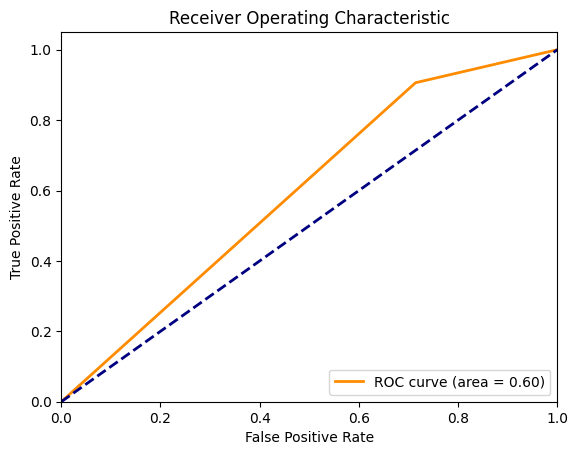

In [ ]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Assuming a threshold of 0.5 for classification

# Compute F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

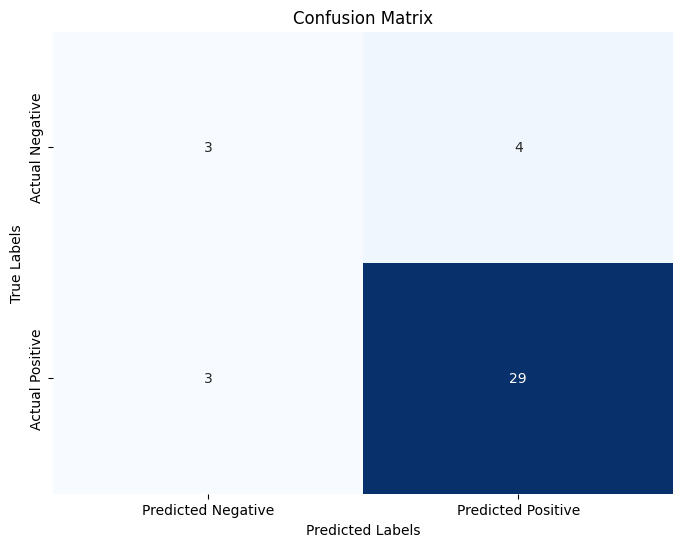

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
